In [1]:
import xarray as xr
import sys
import glob
import numpy as nmp

In [2]:
fresults=sorted(glob.glob('result_??.nc'))
ds=xr.open_mfdataset(fresults,concat_dim='time',combine='nested')

In [3]:
ds

<xarray.Dataset>
Dimensions:         (time: 10188)
Coordinates:
  * time            (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Data variables:
    latitude        (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sossheig_np     (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sossheig_bl     (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    distance        (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    time_counter    (time) datetime64[ns] dask.array<chunksize=(167,), meta=np.ndarray>
Attributes:
    about:    Created with Gonzag package => https://github.com/brodeau/gonzag

In [4]:
ds.time_counter

<xarray.DataArray 'time_counter' (time: 10188)>
dask.array<concatenate, shape=(10188,), dtype=datetime64[ns], chunksize=(173,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time

In [5]:
VT = ds.time

In [6]:
print(VT)

<xarray.DataArray 'time' (time: 10188)>
array([1.391383e+18, 1.391383e+18, 1.391383e+18, ..., 1.396827e+18,
       1.396827e+18, 1.396827e+18])
Coordinates:
  * time     (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time


In [62]:
VM=ds.sla_unfiltered

In [63]:
VM[3767:3866].values

array([ 0.102,  0.118,  0.12 ,  0.101,  0.121,  0.121,  0.102,  0.101,
        0.095,  0.075,  0.069,  0.062,  0.026,  0.059,  0.054,  0.051,
        0.064,  0.043,  0.057,  0.043,  0.042,  0.058,  0.07 ,  0.08 ,
        0.094,  0.089,  0.098,  0.106,  0.11 ,  0.111,  0.116,  0.102,
        0.096,  0.088,  0.091,  0.08 ,  0.045,  0.075,  0.043,  0.034,
        0.026,  0.047,  0.048,  0.046,  0.06 ,  0.066,  0.082,  0.111,
        0.117,  0.151,  0.161,  0.145,  0.259,  0.161,  0.115,  0.11 ,
        0.056,  0.05 ,  0.105,  0.07 ,  0.079,  0.031,  0.017,    nan,
          nan, -0.05 , -0.026,  0.008,  0.048,  0.093,  0.112,  0.119,
        0.113,  0.095,  0.088,  0.091,  0.076,  0.091,  0.114,  0.138,
        0.138,  0.118,  0.141,  0.124,  0.111,  0.136,  0.142,  0.131,
        0.13 ,  0.124,  0.138,  0.16 ,  0.168,  0.186,  0.158,  0.151,
        0.15 ,  0.137,  0.117])

In [64]:
ii=nmp.where(nmp.isnan(VM.values)==1)

In [66]:
print(ii[0])

[3830 3831 8962 8963]


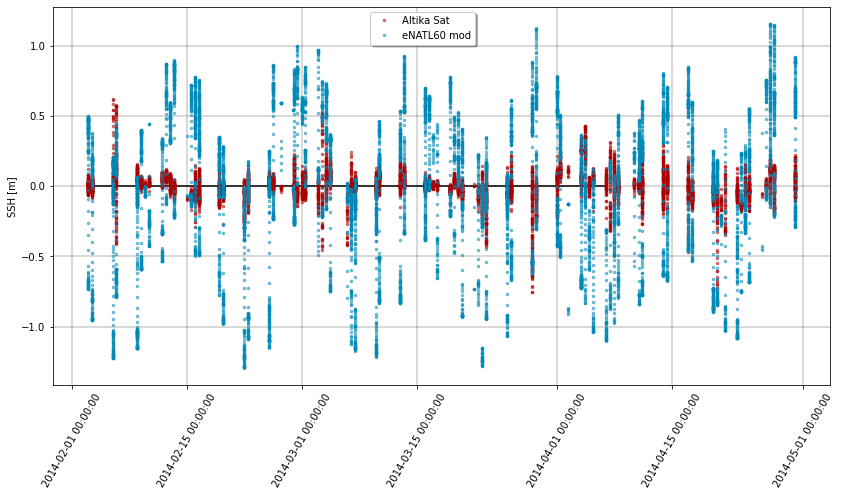

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

clr_sat = '#AD0000'
clr_mod = '#008ab8'

VT = ds.time_counter ; # time from UNIX Epoch to Matlplotlib friendly...

fig = plt.figure(num = 1, figsize=(12,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation='60')
plt.hlines(0,VT[0],VT[-1], colors='k',                   label=None,  zorder=5)
plt.plot(VT, ds.sla_unfiltered-nmp.mean(ds.sla_unfiltered), '.', color=clr_sat, markersize=5, alpha=0.5, label='Altika Sat', zorder=10)
plt.plot(VT, ds.sossheig_bl-nmp.mean(ds.sossheig_bl), '.', color=clr_mod, markersize=5, alpha=0.5, label='eNATL60 mod', zorder=15)
plt.ylabel('SSH [m]')
ax.grid(color='k', linestyle='-', linewidth=0.3)
lgnd = plt.legend(bbox_to_anchor=(0.55, 1.), ncol=1, shadow=True, fancybox=True)



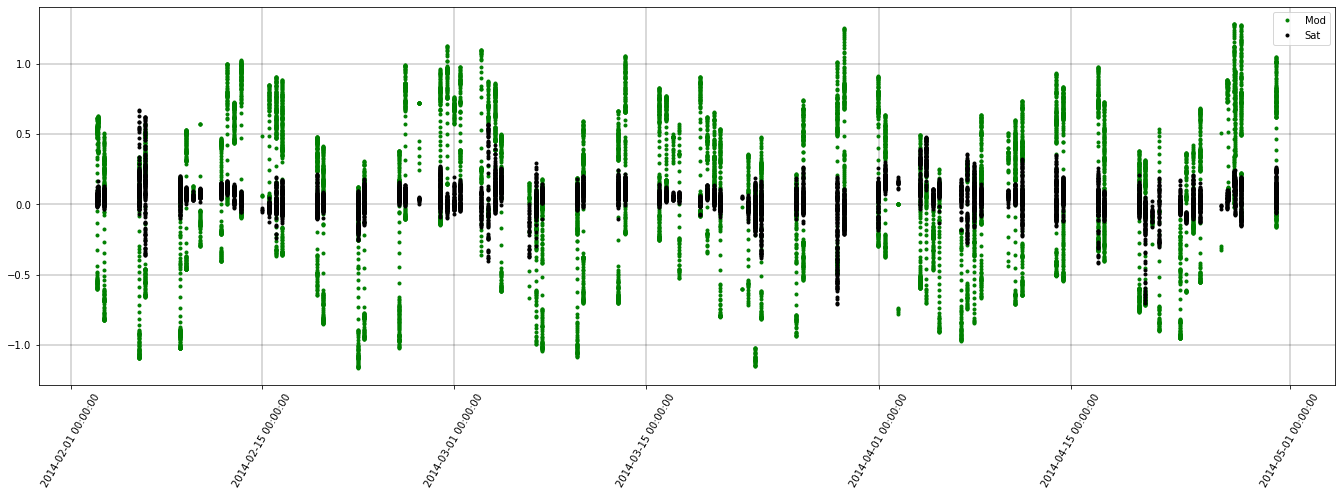

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

fig = plt.figure(num = 1, figsize=(20,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
#plt.plot(ds.time_counter,ds.sossheig_np,'b.',label='Nearest Point')
plt.plot(ds.time_counter,ds.sossheig_bl,'g.',label='Mod')
plt.plot(ds.time_counter,ds.sla_unfiltered,'k.', label='Sat')
plt.legend()
plt.xticks(rotation='60')
ax.grid(color='k', linestyle='-', linewidth=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))


In [9]:
from gonzag.spectralysis import *


In [10]:
ISeg_beg, ISeg_end = FindUnbrokenSegments( ds.time, ds.distance, ds.sossheig_bl, \
                                             rcut_time=1.2e+09, rcut_dist=7.8 )


In [11]:
print(ISeg_beg, ISeg_end)

[    0    49   167   202   216   315   364   483   488   537   567   616
   679   727   778   815   864   886   935  1052  1101  1131  1220  1223
  1272  1391  1396  1445  1564  1568  1617  1736  1741  1790  1817  1866
  1969  2015  2018  2137  2138  2164  2168  2217  2336  2341  2390  2509
  2513  2523  2562  2651  2662  2711  2830  2835  2874  2884  2912  2961
  3024  3072  3157  3202  3206  3219  3251  3268  3381  3430  3452  3459
  3460  3469  3543  3581  3592  3688  3709  3758  3877  3881  3930  4049
  4054  4103  4132  4156  4166  4181  4265  4292  4314  4433  4436  4478
  4527  4646  4651  4700  4819  4823  4843  4872  4974  4984  5023  5120
  5142  5167  5175  5191  5215  5264  5265  5325  5373  5405  5459  5508
  5530  5575  5579  5742  5785  5861  5863  5912  5933  5947  6027  6076
  6149  6174  6177  6223  6226  6252  6275  6336  6340  6389  6508  6512
  6561  6602  6680  6682  6719  6731  6750  6832  6881  6918  6967  6984
  7033  7079  7128  7133  7134  7171  7234  7283  7

In [12]:
print(len(ISeg_beg))

242


In [13]:
ds.distance[12].values-ds.distance[11].values

6.593076418648025

In [14]:
NbSeg, Nsl, IDEDSeg = SegmentSelection(ISeg_beg, ISeg_end, np_valid_seg=70)


 *** [SegmentSelection()]: Will use 25 segments with a fixed length of 100 points!
     ==> 25 selected segments out of the 242 available (requested minimum length is 70 points)



In [15]:
IDseg=IDEDSeg
Vd=ds.distance
VS=ds.sossheig_bl
VM=ds.sla_unfiltered

In [16]:
    from scipy.signal import detrend, tukey
    #
    #
    NbS = IDseg.shape[0] ; # number of segments
    if ivrb>1: print(' *** [Process4FFT()] NbS = ', NbS)

    Nsl = IDseg[0,1]-IDseg[0,0]+1 ; # length of segments
    if ivrb>1: print(' *** [Process4FFT()] Nsl = ', Nsl)
    
    vs_s = nmp.zeros((NbS,Nsl))
    vs_m = nmp.zeros((NbS,Nsl))
    


In [17]:
NbS

25

In [45]:
js=12

In [46]:
        it1 = IDseg[js,0]
        it2 = IDseg[js,1]


In [47]:
print(it1,it2)

3767 3866


In [48]:
            dmean = nmp.mean(Vd[it1+1:it2+1].values-Vd[it1:it2].values)
            print(' *** [Process4FFT()]: Mean distance between two consecutive points is '+str(dmean)+' km\n')
            # Sample spacing in [km] (inverse of the sampling rate):
            dx_sample = nmp.round(dmean,3)
            print('     => will use a spatial sample spacing of '+str(dx_sample)+' km\n')


 *** [Process4FFT()]: Mean distance between two consecutive points is 6.603287276930684 km

     => will use a spatial sample spacing of 6.603 km



In [49]:
Vd[it1+1:it2+1].values


array([1545.12652333, 1551.7249836 , 1558.32363709, 1564.92250413,
       1571.52138895, 1578.12024815, 1584.7194262 , 1591.31866359,
       1597.91778579, 1604.51722412, 1611.11667479, 1617.71622367,
       1624.31586987, 1630.91576315, 1637.51551453, 1644.11559799,
       1650.71562448, 1657.31587321, 1663.91601908, 1670.51638545,
       1677.11686337, 1683.71745196, 1690.31817173, 1696.91887098,
       1703.51985174, 1710.1207235 , 1716.72183109, 1723.32306558,
       1729.92429659, 1736.52563137, 1743.1270905 , 1749.72867314,
       1756.33031412, 1762.93207693, 1769.5339607 , 1776.13594317,
       1782.73804495, 1789.34017856, 1795.94242982, 1802.54479791,
       1809.14726051, 1815.74979529, 1822.35237929, 1828.95518497,
       1835.55799522, 1842.1609389 , 1848.76399368, 1855.36718029,
       1861.97036822, 1868.57364325, 1875.17704769, 1881.78066736,
       1888.38422009, 1894.98798645, 1901.59190065, 1908.19583215,
       1914.79965036, 1921.40370063, 1928.00793894, 1934.61234

In [51]:
VS[it1:it2+1].values


array([-0.29677162, -0.29673172, -0.2925283 , -0.28562052, -0.2790402 ,
       -0.27397448, -0.26728108, -0.2600799 , -0.24700992, -0.23501869,
       -0.22454118, -0.21094047, -0.18857156, -0.14825355, -0.0640872 ,
        0.024036  ,  0.1251637 ,  0.22102961,  0.31770769,  0.40473742,
        0.48399504,  0.55367037,  0.60772514,  0.6418509 ,  0.6623539 ,
        0.66758638,  0.66676421,  0.66924929,  0.68509607,  0.70056596,
        0.71952962,  0.74044851,  0.76024733,  0.77788828,  0.79078057,
        0.79926273,  0.80300857,  0.80454493,  0.80389616,  0.80369493,
        0.80345243,  0.80214504,  0.79905767,  0.79435598,  0.78768496,
        0.77970424,  0.77159583,  0.76116044,  0.74731541,  0.73100119,
        0.71439284,  0.69928031,  0.68564286,  0.67298917,  0.66229268,
        0.65720981,  0.65535075,  0.65410754,  0.65684859,  0.65947502,
        0.65921399,  0.66215996,  0.66849359,  0.67474205,  0.68098398,
        0.67949591,  0.67330558,  0.67631023,  0.67253359,  0.66

In [23]:
dmean = nmp.mean(Vd[it1+1:it2+1].values-Vd[it1:it2].values)

In [24]:
print(dmean)

6.603287276930684


In [25]:
dx_sample = nmp.round(dmean,3)

In [26]:
dx_sample

6.603

In [41]:
        vs_s[js,:] = VS[it1:it2+1].values
        vs_m[js,:] = VM[it1:it2+1].values


In [42]:
            vs_s[js,:] = detrend(vs_s[js,:],type='linear')
            vs_m[js,:] = detrend(vs_m[js,:],type='linear')


In [43]:
        vs_s[js,:] = vs_s[js,:] - nmp.mean(vs_s[js,:])
        vs_m[js,:] = vs_m[js,:] - nmp.mean(vs_m[js,:])


In [44]:
            wdw =  tukey(Nsl,0.5)
            if js==0: print(' *** [Process4FFT()]: applying "Tukey" tappering...')
            vs_s[js,:] = vs_s[js,:]*wdw
            vs_m[js,:] = vs_m[js,:]*wdw


In [31]:
XPs, XPm, rdist_sample = Process4FFT( IDEDSeg, ds.distance, ds.sossheig_bl, ds.sla_unfiltered )


0
 *** [Process4FFT()]: applying linear detrending...
 *** [Process4FFT()]: centering about 0...
 *** [Process4FFT()]: applying "Tukey" tappering...
1
2
3
4
5
6
7
8
9
10
11
12


ValueError: array must not contain infs or NaNs

In [ ]:
Kwn, PwSpc_s, PwSpc_m = ApplyFFT( IDEDSeg, XPs, XPm, rdist_sample )
